In [1]:
import pandas as pd
import numpy as np
header_data = ['sumofbytes','uniqdips','uniqdports']
data = pd.read_csv('C:\\Users\\Stephen\\OneDrive\\School\\CS6301-SDN\\Project\\ESdata.csv', header = None)

In [2]:
data.rename(columns = {0: 'sumofbytes', 1: 'uniqdips', 2:'uniqdports'},inplace=True)

In [3]:
data.head()

,sumofbytes,uniqdips,uniqdports
0,36430,9,20
1,44021,8,21
2,14294,7,8
3,22945,8,9
4,19762,8,11


In [4]:
data.shape

(11657, 3)

In [5]:
data.describe()

,sumofbytes,uniqdips,uniqdports
count,1.165700e+04,11657.000000,11657.000000
mean,5.858172e+03,1.556661,3.530582
std,2.185034e+04,1.432681,4.856003
min,6.600000e+01,1.000000,1.000000
25%,7.400000e+02,1.000000,1.000000
50%,3.350000e+03,1.000000,1.000000
75%,8.683000e+03,1.000000,4.000000
max,1.357220e+06,11.000000,114.000000


In [6]:
data.uniqdips.value_counts()

1     9104
2     1210
3      444
4      289
5      178
6      133
7      100
8       93
9       68
10      28
11      10
Name: uniqdips, dtype: int64

Populating the interactive namespace from numpy and matplotlib


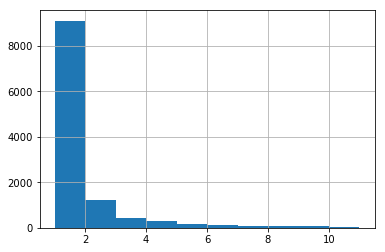

In [7]:
%pylab inline
data.uniqdips.hist(bins=10)

In [8]:
data.uniqdports.value_counts()

1      6592
2      1348
3       646
10      443
11      435
9       387
4       349
12      336
8       240
13      183
5       178
7       148
6       120
14      102
15       55
16       28
17       11
18        8
25        5
21        5
24        4
27        4
19        4
28        4
20        3
23        2
29        2
108       2
26        2
22        2
32        1
77        1
97        1
110       1
114       1
59        1
109       1
100       1
31        1
Name: uniqdports, dtype: int64

In [9]:
new_data = data[(data.uniqdports != 6091)  & (data.uniqdports != 711) & (data.uniqdports != 284)]

In [10]:
new_data.uniqdports.value_counts()

1      6592
2      1348
3       646
10      443
11      435
9       387
4       349
12      336
8       240
13      183
5       178
7       148
6       120
14      102
15       55
16       28
17       11
18        8
25        5
21        5
24        4
27        4
19        4
28        4
20        3
23        2
29        2
108       2
26        2
22        2
32        1
77        1
97        1
110       1
114       1
59        1
109       1
100       1
31        1
Name: uniqdports, dtype: int64

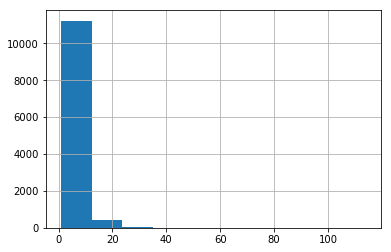

In [11]:
new_data.uniqdports.hist(bins=10)

In [12]:
new_data[new_data.uniqdips.isnull()]

,sumofbytes,uniqdips,uniqdports


In [13]:
new_data[new_data.uniqdips==0]

,sumofbytes,uniqdips,uniqdports


In [14]:
new_data[new_data.uniqdports==0]

,sumofbytes,uniqdips,uniqdports


In [15]:
new_data[new_data.uniqdports.isnull()]

,sumofbytes,uniqdips,uniqdports


In [16]:
new_data[new_data.sumofbytes.isnull()]

,sumofbytes,uniqdips,uniqdports


In [17]:
new_data[new_data.sumofbytes==0]

,sumofbytes,uniqdips,uniqdports


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

In [19]:
data_scaled

array([[ 1.39920644,  5.19561302,  3.39170415],
       [ 1.74663009,  4.49759118,  3.59764368],
       [ 0.3860896 ,  3.79956934,  0.92042975],
       ..., 
       [-0.20779386, -0.3885617 , -0.52114697],
       [ 0.1033359 , -0.3885617 , -0.52114697],
       [-0.21475057, -0.3885617 , -0.52114697]])

In [20]:
# using elbow graph to find out the number of k's
def find_k (X, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

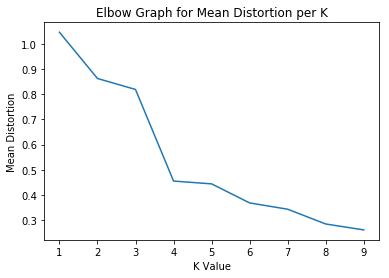

In [21]:
find_k(np.matrix(data_scaled), range(1,10),1)
#find_k(np.matrix(data_scaled), range(1,50),1)

In [22]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_model.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [23]:
new_data['labels'] = kmeans_model.labels_

In [24]:
new_data.head()

,sumofbytes,uniqdips,uniqdports,labels
0,36430,9,20,2
1,44021,8,21,2
2,14294,7,8,2
3,22945,8,9,2
4,19762,8,11,2


In [25]:
new_data[new_data['labels'] == 1]

,sumofbytes,uniqdips,uniqdports,labels
142,332338,11,109,1
147,377504,11,114,1
163,400918,11,108,1
178,341965,11,97,1
183,1357220,11,59,1
192,355834,11,110,1
228,323070,11,108,1
233,1336316,11,77,1
249,341874,11,100,1


In [26]:
new_data[new_data['labels'] == 0]

,sumofbytes,uniqdips,uniqdports,labels
15,14061,2,16,0
33,8908,2,11,0
82,10516,2,12,0
98,7245,1,9,0
112,8042,2,10,0
124,7855,2,9,0
133,8096,2,11,0
140,9128,2,11,0
188,5268,1,6,0
197,9232,2,13,0


In [27]:
new_data[new_data['labels'] == 2]

,sumofbytes,uniqdips,uniqdports,labels
0,36430,9,20,2
1,44021,8,21,2
2,14294,7,8,2
3,22945,8,9,2
4,19762,8,11,2
5,13552,8,9,2
6,13410,7,9,2
7,21374,10,12,2
8,15097,7,10,2
9,24332,9,13,2


In [28]:
new_data.shape

(11657, 4)

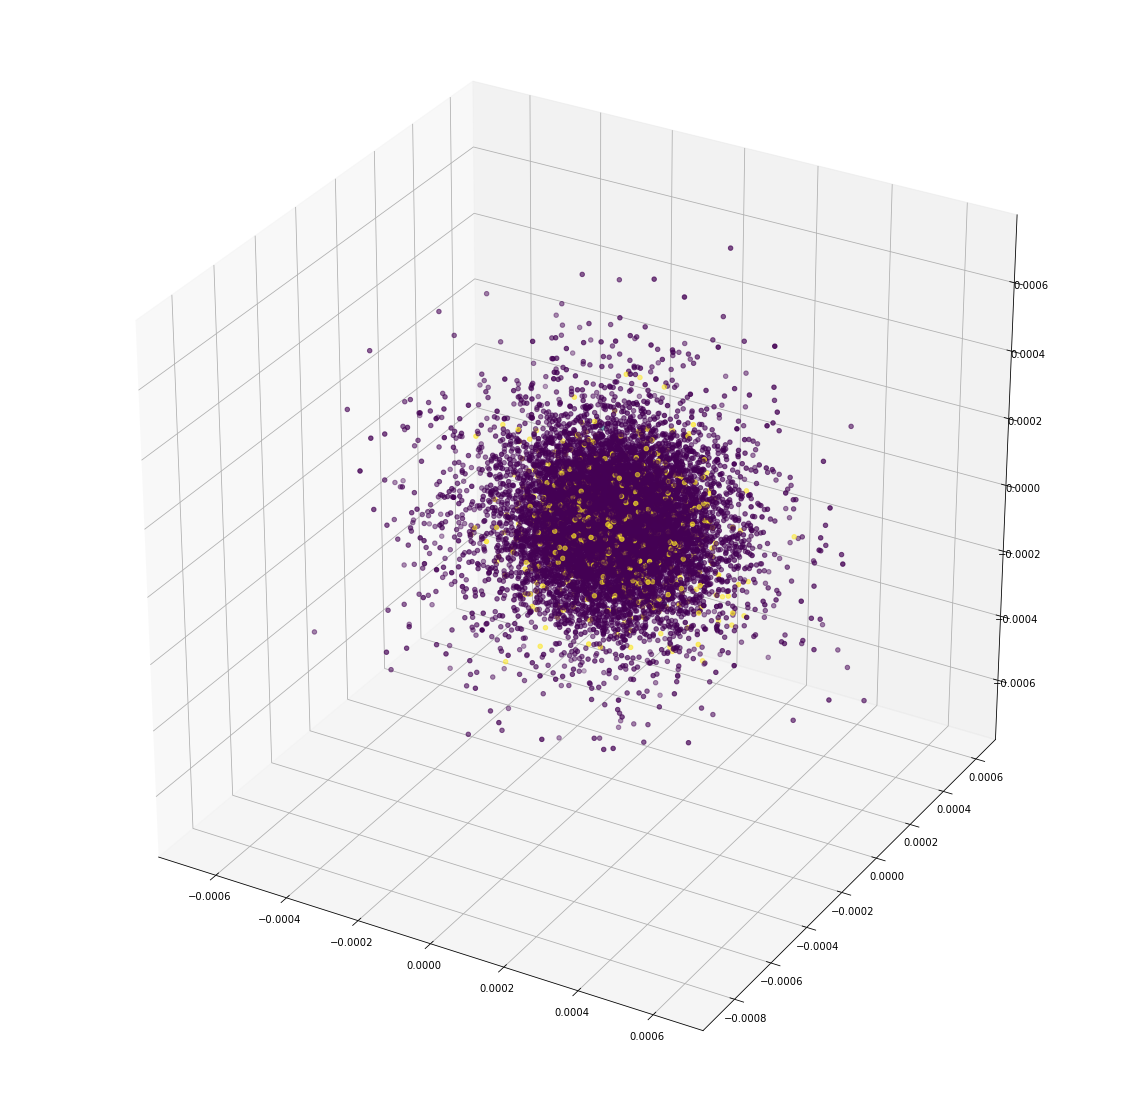

In [31]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(new_data) 
plt.figure(figsize=(20,20))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model.labels_)